<a href="https://colab.research.google.com/github/jaideep6214/Breast-Cancer-Classification-using-SVM/blob/master/SVM_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## **Loading All Libraries**

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Reading Data**

In [36]:
df=pd.read_csv("/content/gdrive/My Drive/ML Projects/SVM/Breast Cancer SVM/data.csv",sep=",",header=0)

## **Exploring Data**

In [37]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [38]:
df.dtypes   #diagnosis is to be one hot encoded as it is object

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [39]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [40]:
df["diagnosis"].unique()  #Diagnosis (M = malignant, B = benign)

array(['M', 'B'], dtype=object)

In [41]:
df.shape  # We have 569 Patients with 33 Independent Variables

(569, 33)

## **Removing Null Values**

In [42]:
df.isnull().sum()   #We will drop Unnamed its full of Na values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [43]:
df.dropna(axis=1,inplace=True)  # You have droped Unnamed column

In [44]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [45]:
df.shape

(569, 32)

In [46]:
df.drop(['id'], axis=1, inplace=True) #id is different for all

In [47]:
df.shape  #569 Patients with 31

(569, 31)

## **Visualising Data**

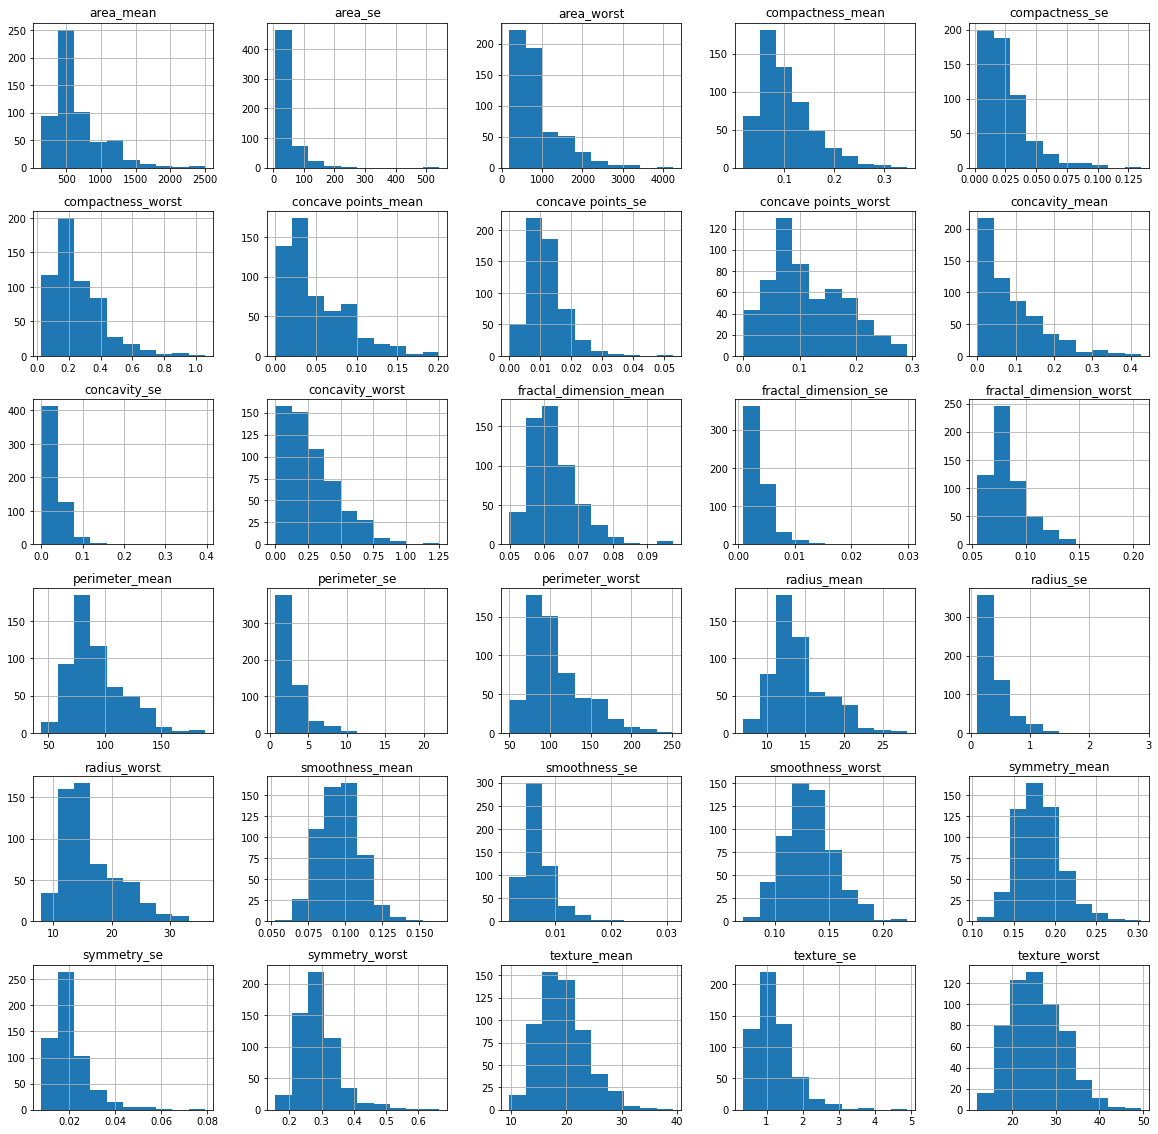

In [48]:
df.hist(figsize = (20, 20))
plt.show()

## **Splitting Data into Training and Testing**

In [49]:
df.shape

(569, 31)

In [50]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
#Splitting into x and y
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [52]:
print(df.iloc[:,0])

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [53]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


## **Making One Hot Encoding**

In [54]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [56]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

## **Splitting Data**

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Normalised**

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Correlation Matrix**

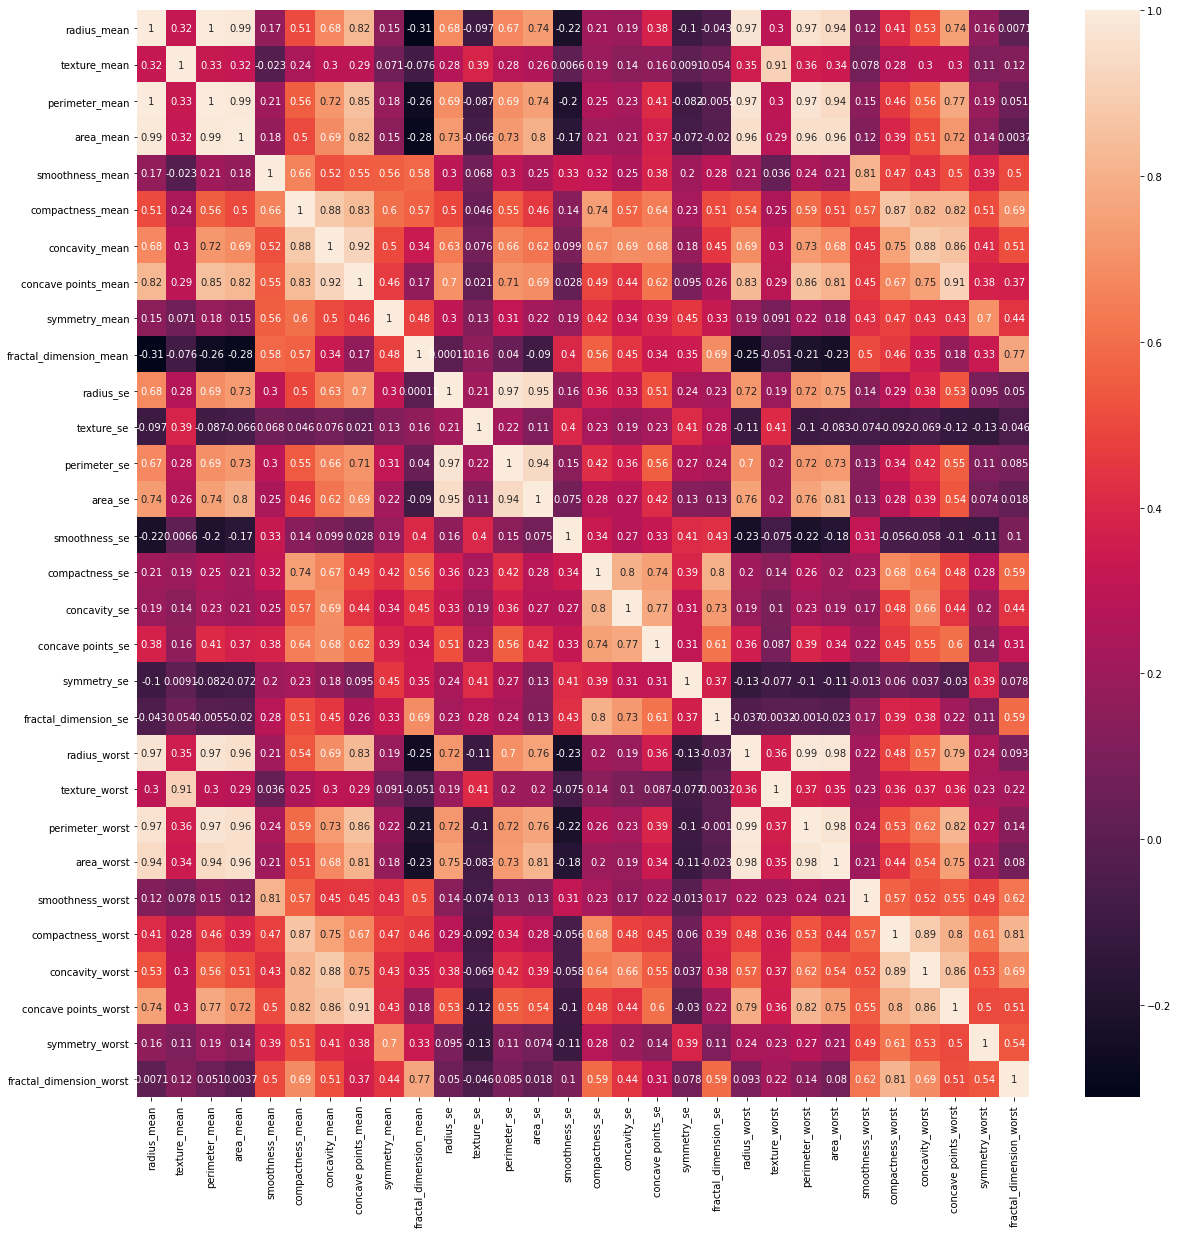

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

## **Importing Libraries for Model**

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

## **Model-1 Linear kernel**

In [65]:
#MODEL-1 Apply the linear kernel
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc=SVC(kernel="linear",C=c)
    scores=cross_val_score(svc,X_train,y_train,cv=10,scoring="accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.9714975845410627, 0.9693236714975846, 0.9714975845410627, 0.9715458937198068, 0.9737681159420291, 0.9694202898550724, 0.965072463768116, 0.9672946859903382, 0.9694685990338165, 0.9694685990338165, 0.9694685990338165, 0.9672463768115943, 0.9694202898550724, 0.9671980676328502, 0.9650241545893721, 0.9650241545893721, 0.9650241545893721, 0.9650241545893721, 0.9650241545893721, 0.9628502415458937, 0.9628502415458937, 0.9628502415458937, 0.9650241545893721, 0.9650241545893721, 0.9650241545893721]


## **Optimum Value of C**

Text(0, 0.5, 'Cross-Validation Accuracy')

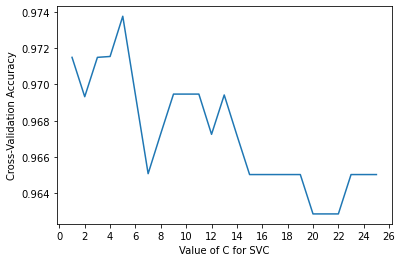

In [66]:
C_values=list(range(1,26))          #From 4 to 6 there is a peek
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel("Value of C for SVC")
plt.ylabel("Cross-Validation Accuracy")

# **Good Accuracy in between 4 to 6**

In [67]:
C_range=list(np.arange(4,6,0.1))
acc_score=[]
for c in C_range:
    svc=SVC(kernel="linear",C=c)
    scores=cross_val_score(svc,X_train,y_train,cv=10,scoring="accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.9715458937198068, 0.9715458937198068, 0.9715458937198068, 0.9715458937198068, 0.9715458937198068, 0.9715458937198068, 0.9715458937198068, 0.9715458937198068, 0.9715458937198068, 0.9737681159420291, 0.9737681159420291, 0.9737681159420291, 0.9737681159420291, 0.9737681159420291, 0.9737681159420291, 0.9737681159420291, 0.9715942028985507, 0.9694202898550724, 0.9694202898550724, 0.9694202898550724]


Text(0, 0.5, 'Cross-Validation Accuracy')

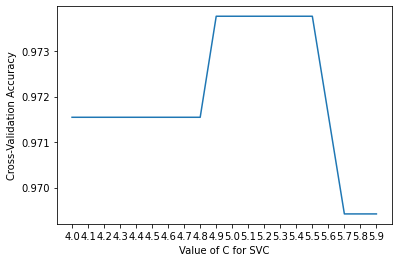

In [68]:
C_values=list(np.arange(4,6,0.1))         #Max in 5.3
plt.plot(C_values,acc_score)
plt.xticks(np.arange(4,6,0.1))
plt.xlabel("Value of C for SVC")
plt.ylabel("Cross-Validation Accuracy")

## **Training Model-1 in C=5.3**

In [69]:
model_linear=SVC(kernel="linear",C=5.3)
model_linear.fit(X_train,y_train)

SVC(C=5.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Accuracy=94.73%**

In [70]:
score=model_linear.score(X_test,y_test)
print(score)

0.9473684210526315


## **Model-2 RBF Kernel**

In [71]:
#MODEL-2 Apply the rbf kernel
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc=SVC(kernel="rbf",gamma=g)
    scores=cross_val_score(svc,X_train,y_train,cv=10,scoring="accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.7561352657004831, 0.9473429951690822, 0.9714492753623188, 0.9604830917874396, 0.6418357487922706, 0.6374396135265702, 0.6374396135265702]


## **Optimum Value of Gamma**

Text(0, 0.5, 'Cross-Validated Accuracy')

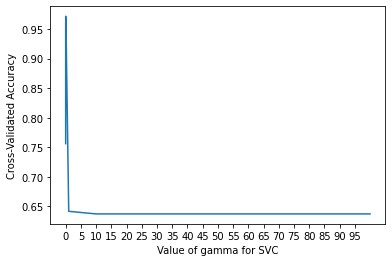

In [72]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
plt.plot(gamma_range,acc_score)
plt.xlabel("Value of gamma for SVC")
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel("Cross-Validated Accuracy")

## **Between 0 to 0.1**

In [73]:
#More Closer between 0 to 0.1
gamma_range=[0.0001,0.001,0.01,0.1,1]
acc_score=[]
for g in gamma_range:
    svc=SVC(kernel="rbf",gamma=g)
    scores=cross_val_score(svc,X_train,y_train,cv=10,scoring="accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.7561352657004831, 0.9473429951690822, 0.9714492753623188, 0.9604830917874396, 0.6418357487922706]


## **Between 0.001 to 0.09**

In [74]:
gamma_range=[0.001,0.003,0.005,0.007,0.09]
acc_score=[]
for g in gamma_range:
    svc=SVC(kernel="rbf",gamma=g)
    scores=cross_val_score(svc,X_train,y_train,cv=10,scoring="accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.9473429951690822, 0.9583091787439614, 0.9627053140096619, 0.9692270531400966, 0.962657004830918]


Text(0, 0.5, 'Cross-Validated Accuracy')

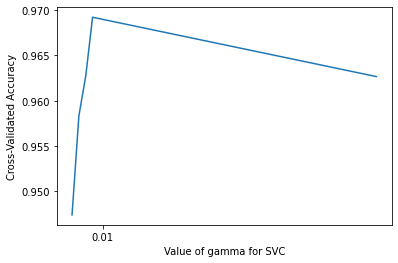

In [75]:
gamma_range=[0.001,0.003,0.005,0.007,0.09]
plt.plot(gamma_range,acc_score)
plt.xlabel("Value of gamma for SVC")
plt.xticks(np.arange(0.01,0.1,5))
plt.ylabel("Cross-Validated Accuracy")

In [76]:
gamma_range=np.arange(0.1,0.2,0.01)
acc_score=[]
for g in gamma_range:
    svc=SVC(kernel="rbf",gamma=g)
    scores=cross_val_score(svc,X_train,y_train,cv=10,scoring="accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.9604830917874396, 0.9560869565217391, 0.9560869565217391, 0.953913043478261, 0.953913043478261, 0.9495652173913044, 0.9495652173913044, 0.9473913043478263, 0.9429951690821256, 0.9407729468599033]


## **Training Model-2 where Gamma=0.1**

In [77]:
# on 0.1 gamma 
model_rbf=SVC(kernel="rbf",gamma=0.1)
model_rbf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Accuracy=95.61%**

In [78]:
score=model_rbf.score(X_test,y_test)
print(score)

0.956140350877193


## **Model-3 Poly Kernel**

In [79]:
#MODEL-3 Apply the poly kernel
degree_l=[2,3,4,5,6]
acc_score=[]
for d in degree_l:
    svc=SVC(kernel="poly",degree=d)
    scores=cross_val_score(svc,X_train,y_train,cv=10,scoring="accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.8199516908212561, 0.8923188405797102, 0.808743961352657, 0.8396135265700483, 0.7956521739130434]


## **Optimum Value of Degree**

Text(0, 0.5, 'Cross_Validated Accuracy')

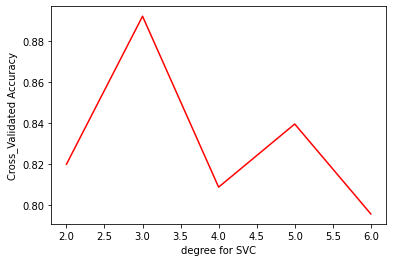

In [80]:
plt.plot(degree_l,acc_score,color="r")
plt.xlabel("degree for SVC")
plt.ylabel("Cross_Validated Accuracy")

In [81]:
degree_l=[2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,4]
acc_score=[]
for d in degree_l:
    svc=SVC(kernel="poly",degree=d)
    scores=cross_val_score(svc,X_train,y_train,cv=10,scoring="accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.8199516908212561, 0.8199516908212561, 0.8923188405797102, 0.8923188405797102, 0.8923188405797102, 0.8923188405797102, 0.8923188405797102, 0.8923188405797102, 0.8923188405797102, 0.808743961352657]


## **Training on Degree=3**

In [82]:
#Best degree is 3
model_poly=SVC(kernel="poly",degree=3)
model_poly.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Accuracy=90.35%**

In [83]:
score=model_poly.score(X_test,y_test)
print(score)

0.9035087719298246


## **Model-4 Best Model Using Everything**

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
#Grid Search
tuned_parameters={"C":(np.arange(4.5,6,0.1)),"kernel":['linear'],'gamma':[0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15],'kernel':["rbf"],'degree':[2,3,4],'kernel':['poly']}

svm_model=SVC()
model_gsvm=GridSearchCV(svm_model,tuned_parameters,cv=10,scoring="accuracy")
model_gsvm.fit(X_train,y_train)
print(model_gsvm.best_score_)
print(model_gsvm.best_params_)
y_pred=model_gsvm.predict(X_test)


0.9604830917874395
{'C': 4.5, 'degree': 3, 'gamma': 0.08, 'kernel': 'poly'}


In [87]:
import sklearn.metrics as metrics

In [88]:
print(metrics.accuracy_score(y_pred,y_test))

0.9824561403508771


## **Result was 'C': 4.5, 'degree': 3, 'gamma': 0.08, 'kernel': 'poly'**

In [89]:
#My result was C:5.3,gamma:0.1,degree:3
model_final=SVC(kernel="poly",degree=3,gamma=0.08,C=4.5)
model_final.fit(X_train,y_train)

SVC(C=4.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.08, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Accuracy=98.245%**

In [90]:
score=model_final.score(X_test,y_test)
print(score)

0.9824561403508771
